<a href="https://colab.research.google.com/github/madonnaojorin/MAT494/blob/main/2.2_Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2.2.1 Probability Axioms
###2.2.1.1 Sample Spaces and Events

####Definition 2.2.1<br>
The sample space of an experiment, denoted by $S$, is the setof all possible outcomes of that experiment.

####Definition 2.2.2<br>
An event is any collection (subset) of outcomes contained inthe sample spaceS. An event is simple if it consists of exactly one outcomeand compound if it consists of more than one outcome.

####Definition 2.2.3<br>
Given an experiment and a sample space $S$, the probabilitydistribution is a function which assign to each eventAa number $P(A)$, calledthe probability of the event $A$, which will give a precise measure of the chancethatAwill occur. The probability assignments should satisfy the followingaxioms (basic properties) of probability.

*   For any event $A,1\geq P(A)\geq0$
*   $P(S)=1$
*   If $A_1,A_2,A_3,\cdots$ is an infinite collection of disjoint events, then $P(A_1∪A_2∪A_3∪\cdots)=\sum_{i=1}^\infty P(A_i)$
*  For any event $A$, $P(A)+P(A′)=1$, from which $P(A)=1−P(A′)$
*   When eventsAandBare mutually exclusive, $P(A∪B)=P(A)+P(B)$
*   For any two events $A$ and $B$, $P(A∪B)=P(A)+P(B)−P(A∩B)$

####Example 2.2.4<br>
In many experiments consisting of $N$ outcomes, it is reasonable to assign equal probabilities to allNsimple events. That is, if there are $N$ equally likely outcomes, the probability for each is1/N. Now consider an event $A$, with $N(A)$ denoting the number of outcomes contained in $A$ and we have $$P(A)=\frac{N(A)}{N}$$

##2.2.2 Conditional Probability

####Definition 2.2.5<br>
For any two events $A$ and $B$ with $P(B)>0$, the conditional probability of $A$ given that $B$ has occurred is defined by $$P(A|B)=P(A\cap B)P(B)$$
Conditional probability give a rise to the multiplication rule $$P(A\cap B)=P(A|B)\cdot P(B)$$


####Definition 2.2.6<br>
Two events $A$ and $B$ are independent if $P(A|B)=P(A)(P(A\cap B)=P(A)\cdot P(B))$ and are dependent otherwise.



####Definition 2.2.7<br>
Events $A_1,\cdots,A_n$ are mutually independent if for every $k(k=2,3,\cdots,n)$ and every subset of indices $i_1,i_2,\cdots,i_k$,
$$P(A_{i_1}\cap A_{i_2}\cap \cdots \cap A_{i_k})=P(A_{i_1})\cdot P(A_{i_2})\cdots P(A_{i_k})$$

In [ ]:
# import pandas as pd
# url = 'https://github.com/madonnaojorin/MAT494/blob/main/Data/student-mat.csv'
# df = pd.read_csv(url)
# df.head(3)

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['student-mat.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving student-mat.csv to student-mat (1).csv


In [ ]:
len(df)
#=> 395

395

In [ ]:
import numpy as np 
df['grade_A'] = np.where(df['G3']*5 >= 80, 1, 0)
df['high_absenses'] = np.where(df['absences'] >= 10, 1, 0)
df['count'] = 1
df = df[['grade_A','high_absenses','count']]
df.head()

,grade_A,high_absenses,count
0,0,0,1
1,0,0,1
2,0,1,1
3,0,0,1
4,0,0,1


In [ ]:
pd.pivot_table(
    df, 
    values='count', 
    index=['grade_A'], 
    columns=['high_absenses'], 
    aggfunc=np.size, 
    fill_value=0
)

high_absenses,0,1
grade_A,,
0,277,78
1,35,5


In [ ]:
# P(A)
P_A = (35 + 5) / (35 + 5 + 277 + 78)
print(P_A)

0.10126582278481013


In [ ]:
#P(B)
P_B = (78 + 5) / (35 + 5 + 277 + 78) 
print(P_B)

0.21012658227848102


In [ ]:
#P(A ∩ B)
P_AB = 5 / (35 + 5 + 277 + 78) 
print(P_AB)

0.012658227848101266


In [ ]:
#P(A|B)
P_A_B = P_AB/P_B
print(P_A_B)

0.060240963855421686


##2.2.3 Discrete Random Variables

####Definition 2.2.8<br>
For a given sample space $S$ of some experiment, a random variable is any rule that associates a number with each outcome in $S$. In mathematical language, a random variable is a function whose domain is the sample space and whose range is the set of real numbers. 

####Definition 2.2.9<br>
A discrete random variable is an random variable whose possible values either constitute a finite set or else can be listed in an infinite sequence. A random variable is continuous if both of the following apply:
1.   Its set of possible values consists all numbers in a single interval on the number line.

2.  No possible value of the variable has positive probability, that is, $P(X=c)=0$ for any possible value $c$.


Definition 2.2.10<br>
The probability distribution or probability mass function (pmf) of a discrete random variable is defined for every number $x$ by
$$p(x)=P(X=x)=P(\forall s\in S:X(s)=x)$$


Definition 2.2.11<br>
The cumulative distribution function (cdf) $F(x)$ of a discrete random variable variable $X$ with pmf $p(x)$ is defined for every number $x$ by $$F(x)=P(X\leq x)=\sum_{y:y\leq x}p(y)$$


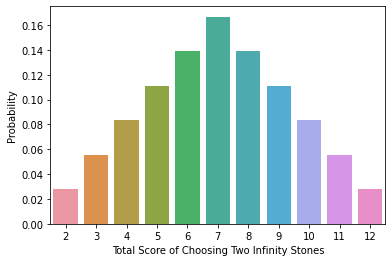

In [ ]:
from itertools import product
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

stones = ['Space', 'Reality', 'Mind', 'Time', 'Power', 'Soul']

# assign scores to each stone
stones_scores = dict(zip(stones, range(1, 7)))

# compute overall scores for choosing two stones
X_omega = {
    (stone1, stone2): stones_scores[stone1] + stones_scores[stone2]
    for stone1, stone2 in product(stones, repeat=2)
}

# total elements in space space
total_sample_outcomes = len(X_omega)

# count frequencies of each value the random variable can assume
frequencies = dict.fromkeys(X_omega.values(), 0)
for sample_outcome, overall_score in X_omega.items():
    frequencies[overall_score] += 1

# compute probabilities
probabilities = pd.DataFrame(
    data=[
        [value, frequency / total_sample_outcomes]
        for value, frequency in frequencies.items()
    ],
    columns=['Total Score of Choosing Two Infinity Stones', 'Probability']
)

# plot PMF as barplot
ax = sns.barplot(
    x='Total Score of Choosing Two Infinity Stones',
    y='Probability',
    data=probabilities,
)
plt.savefig("pmf")

Example 2.2.12<br>
In many cases the only possible values of the random variable are 0 and 1. Any random variable whose only possible values are 0 and1 is called a Bernoulli random variable. Given Bernoulli experiments with outcomes: S (success) and F(failure). The binomial random variable $X$ associated with independent Bernoulli experiment consisting of $n$ trials is defined as $$X=\text{the number of S’s among the} n \text{trials}$$
The probability of success is constant $p$ from trial to trial. The pmf of $X$ has the form $$b(x;n,p)=\begin{cases}{n \choose y}p^x(1-p)^{n-x} &x=0,1,2,3,\cdots\\
0 &\text{otherwise}\end{cases}$$
The cdf of $X$ has the form $$B(x;n,p)=P(X\leq x)=\sum_{y\leq x}b(x;n,p)=\sum_{y=0}^x{n \choose y}p^x(1-p)^{n-x}$$


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

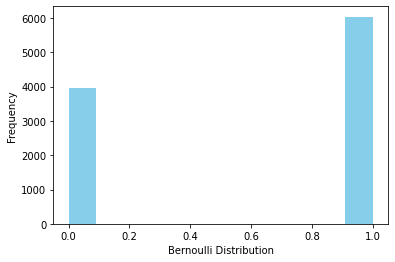

In [ ]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

Example 2.2.13<br>
The Poisson distribution is a discrete probability distribution that describes the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. A discrete random variable $X$ is said to have a Poisson distribution with parameterμif the pmf of $X$ is the pmf of $X$ has the form $$p(x;\mu)=\frac{e^{−\mu}\mu^x}{x!},x=0,1,2,3,\cdots$$

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

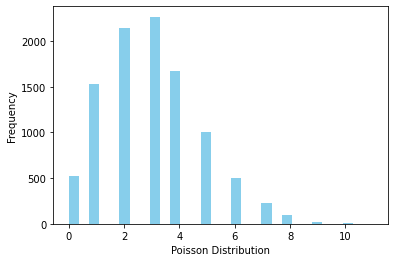

In [ ]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

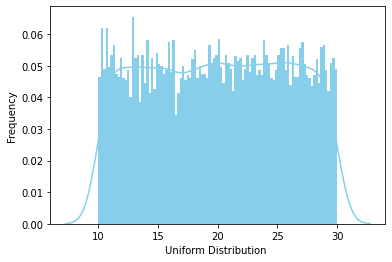

In [ ]:
# Uniform distribution
# import uniform distribution
from scipy.stats import uniform

# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

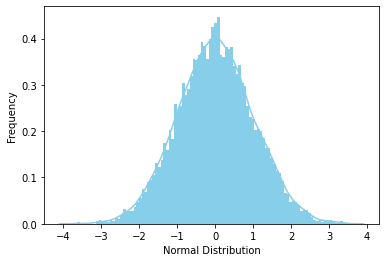

In [ ]:
# Normal Distribution 
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

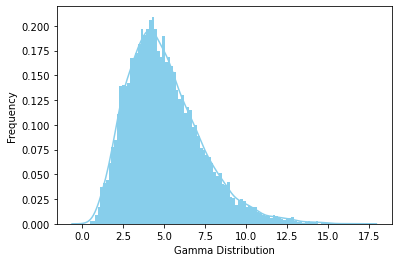

In [ ]:
# Gamma Distribution
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

In [ ]:
# Exponential Distribution
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

In [ ]:
# Binomial Distribution
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

###2.2.3.1 The Expected Value and Variance of $X$



Definition 2.2.14<br>
Let $X$ be a discrete random variable with set of possible values $D$ and pmf $p(x)$. The expected value or mean value of $X$, denoted by $E(X)$ or $\mu\times X$ or just $\mu$, is $$E(X)=\mu_X=\sum_{x\in D}x\cdot p(x)$$

####Example 2.2.15 <br>
Let $X=1$ be a Bernoulli random variable with pmf $p(1)=p,p(0)=1−p$ and, from which $E(X)=0\times p(0)+1\times p(1)=p$. That is, the expected value of $X$ is just the probability that $X$ takes on the value 1.

####Definition 2.2.16<br>
Let $X$ have pmf $p(x)$ and expected value $\mu$. Then the variance of $X$, denoted by $V(X)$ or $\sigma_X^2$,  or just $\sigma^2$, is 
$$V(X)=\sum_D(x-\mu)^2\cdot p(x)=E [(X-\mu)^2]$$ The standard deviation (SD) of $X$ is 
$$\sigma_X=\sqrt{\sigma_X^2}$$


####Proposition 2.2.17<br>
$$V(aX+b)=\sigma^2_{aX+b}=a^2\cdot \sigma^2_X \hspace{3mm}\text{and}\hspace{3mm} \sigma_{aX+b}=|a|\cdot\sigma_x$$
In particular, 
$$\sigma_{aX}=|a|\cdot \sigma_X,\sigma_{X+b}=\sigma_X$$



####Proposition 2.2.18<br>
If $X$ is a binomial random variable with parameters $n,p$, then , $E(X)=np,V(X)=np(1−p),\sigma_X=\sqrt{np(1−p)}.$
If $X$ is a Poisson distribution with parameter $\mu$, then $E(X)=\mu,V(X)=\mu$.

In [ ]:
from numpy import array
from numpy import mean
v = array([1,2,3,4,5,6])
print(v)
result = mean(v)
print(result)

[1 2 3 4 5 6]
3.5


In [ ]:
M = array([[1,2,3,4,5,6],[1,2,3,4,5,6]])
print(M)
col_mean = mean(M, axis=0)
print(col_mean)
row_mean = mean(M, axis=1)
print(row_mean)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[1. 2. 3. 4. 5. 6.]
[3.5 3.5]


In [ ]:
from numpy import var
v = array([1,2,3,4,5,6])
print(v)
result = var(v, ddof=1)
print(result)

[1 2 3 4 5 6]
3.5


In [ ]:
from numpy import std
M = array([[1,2,3,4,5,6],[1,2,3,4,5,6]])
print(M)
col_std = std(M, ddof=1, axis=0)
print(col_std)
row_std = std(M, ddof=1, axis=1)
print(row_std)

##2.2.4 Continues Random Variables

####Definition 2.2.19<br>
Let $X$ be a continuous random variable. Then a probability distribution or probability density function (pdf) of $X$ is a function $f(x)$ such that for any two numbers $a$ and $b$ with $a\leq b$,
$$P(a\leq X\leq b)=\int_a^b f(x)dx$$

###2.2.4.1 Expected Values and Variances

Definition 2.2.20<br>
The expected or mean value of a continuous random variable $X$ with pdf $f(x)$ is $$\mu _X=E(X)=\int_{-\infty}^\infty x\cdot f(x)dx.$$



Definition 2.2.21<br>
The variance of a continuous random variable $X$ with pdf $f(x)$ and mean value $\mu$ is $$\sigma^2_X=V(X)=\int_{-\infty}^\infty (x-\mu)^2\cdot f(x)dx=E[(X-\mu)^2]$$
The standard deviation (SD) of $X$ is $\sigma_X=\sqrt{V(x)}$.



Proposition 2.2.22<br>
The Expected values and variance have the followingproperties;
If $X$ is a continuous random variable with pdf $f(x)$ and $h(X)$ is any function of $X$, then $$E[h(X)]=\mu h(X)=\int_\infty^\infty h(x)\cdot f(x)dx$$
•$$V(X)=E(X^2)-[E(X)]^2$$



Definition 2.2.23<br>
$X$ is said to have an exponential distribution with parameter $\lambda(\lambda>0)$ if the pdf of $X$ is $$f(x;\lambda)=\begin{cases}\lambda e^{-\lambda x} & x\geq\\
0&\text{otherwisw}\end{cases}$$
The expected value of an exponentially distributed random variable $X$ is
$$E(X)=\int_0^\infty x\lambda e^{-\lambda x}dx$$

###2.2.4.2 The Normal Distribution

####Definition 2.2.24<br>
A continuous random variable $X$ is said to have a normal distribution with parameters $\mu$ and $\sigma$ (or $\mu$ and $\sigma^2$), where $-\infty <\mu<\infty$ and $0<\sigma$, if the pdf of $X$ is $$f(x;\mu, \sigma)=\frac{1}{\sqrt{2\pi\sigma}}e^{−(x−\mu)^2/(2\sigma^2)}\hspace{3mm}−\infty<x<\infty$$



####Definition 2.2.25<br>
The normal distribution with parameter values $\mu=0$ and $\sigma=1$ is called the standard normal distribution. A random variable having a standard normal distribution is called a standard normal random variable and will be denoted by $Z$. The pdf of $Z$ is $$f(z; 0,1)=\frac{1}{\sqrt{2\pi\sigma}}e^{−z^2/2}\hspace{3mm}−\infty<x<\infty$$



####Proposition 2.2.26<br>
If $X$ has a normal distribution with meanμand standard deviation $\sigma$,then
$$Z=\frac{X-\mu}{\sigma}$$
has a standard normal distribution. 

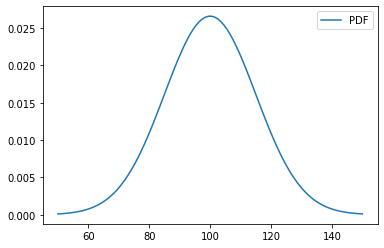

In [ ]:
import math
import scipy.stats as stats
A = stats.norm(loc=100, scale=15)# Declare A to be a normal random variable
print(A)
t = np.linspace(50,150,100)
plt.plot(t,A.pdf(t),label="PDF")
plt.legend()
plt.show()

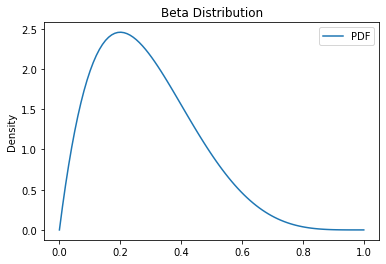

In [ ]:
# Beta distribution
beta=stats.beta(a=2,b=5)
beta.rvs(size=5,random_state=133)
beta_sample=beta.rvs(size=1000,random_state=133)
t=np.linspace(0,1,100)
plt.plot(t,beta.pdf(t),label="PDF")
plt.legend()
plt.ylabel("Density")
plt.title("Beta Distribution")
plt.show()

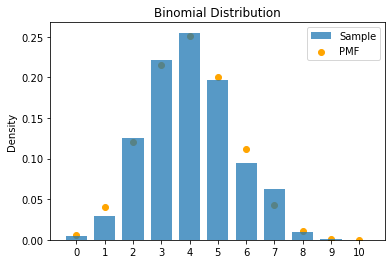

In [ ]:
# Binomial distribution
binomial_sample=binomial.rvs(size=1000,random_state=143)
t = np.arange(0,11)
plt.hist(binomial_sample,bins=11,range=(0,11),density=True,align='left',rwidth=0.75,label="Sample",alpha=0.75)
plt.scatter(t,binomial.pmf(t),label="PMF",color="Orange")
plt.title("Binomial Distribution")
plt.ylabel("Density")
plt.legend()
plt.xticks(t)
plt.show()